# 1. Importação de Bibliotecas

In [35]:
import pandas as pd # Biblioteca para manipulação de dados
import numpy as np   # Biblioteca para operações numéricas

import matplotlib.pyplot as plt  # Biblioteca para visualização de dados
import seaborn as sns  # Biblioteca para visualização de dados

from collections import defaultdict  # Estrutura para agrupar itens em listas

from urllib.parse import quote_plus
import getpass
import urllib
from sqlalchemy import create_engine
import collections

# 2. Leitura e Explorando a tabela Dados Clientes

In [118]:
df_clientes = pd.read_csv(r"src/dados_clientes.csv", sep=';')  # Leitura do arquivo CSV de clientes

In [119]:
df_clientes.info()  # Exibe informações gerais sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238597 entries, 0 to 238596
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CD_CLIENTE              238597 non-null  object
 1   DS_PROD                 238597 non-null  object
 2   DS_LIN_REC              238597 non-null  object
 3   CIDADE                  238597 non-null  object
 4   DS_CNAE                 238597 non-null  object
 5   DS_SEGMENTO             238597 non-null  object
 6   DS_SUBSEGMENTO          238553 non-null  object
 7   FAT_FAIXA               238597 non-null  object
 8   MARCA_TOTVS             237693 non-null  object
 9   MODAL_COMERC            226965 non-null  object
 10  PAIS                    238597 non-null  int64 
 11  PERIODICIDADE           238531 non-null  object
 12  SITUACAO_CONTRATO       238096 non-null  object
 13  UF                      238597 non-null  object
 14  VL_TOTAL_CONTRATO       238597 non-n

# 3. Limpeza dos Dados

In [120]:
df_clientes_att = df_clientes.dropna()  # Remove linhas com valores ausentes
df_clientes_att.info()  # Exibe informações do DataFrame limpo

<class 'pandas.core.frame.DataFrame'>
Index: 226346 entries, 0 to 238596
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CD_CLIENTE              226346 non-null  object
 1   DS_PROD                 226346 non-null  object
 2   DS_LIN_REC              226346 non-null  object
 3   CIDADE                  226346 non-null  object
 4   DS_CNAE                 226346 non-null  object
 5   DS_SEGMENTO             226346 non-null  object
 6   DS_SUBSEGMENTO          226346 non-null  object
 7   FAT_FAIXA               226346 non-null  object
 8   MARCA_TOTVS             226346 non-null  object
 9   MODAL_COMERC            226346 non-null  object
 10  PAIS                    226346 non-null  int64 
 11  PERIODICIDADE           226346 non-null  object
 12  SITUACAO_CONTRATO       226346 non-null  object
 13  UF                      226346 non-null  object
 14  VL_TOTAL_CONTRATO       226346 non-null  

# 4. Filtragem por Segmento de Interesse

In [121]:
df_clientes_varejo = df_clientes_att[df_clientes_att.DS_SEGMENTO == 'SERVICOS']  # Seleciona apenas clientes do segmento 'SERVICOS'
df_clientes_att.shape, df_clientes_varejo.shape  # Mostra o tamanho dos DataFrames antes e depois do filtro

((226346, 16), (36424, 16))

# 5. Agrupamento de Produtos por Nicho

In [122]:
itens = df_clientes_varejo.DS_PROD.unique()  # Lista de produtos únicos

In [123]:
categorized_items = collections.defaultdict(list)

for item in itens:
    item_lower = item.lower()
    classified = False

    # 1. Industry_Specific_Solutions (Check first for industry-specific keywords)
    if not classified and (
        "ponto de venda" in item_lower or "pdv" in item_lower or "varejo" in item_lower or "loja" in item_lower or
        "tef" in item_lower or "bm chef" in item_lower or "bematech chef" in item_lower or "misterchef" in item_lower or
        "g-sat" in item_lower or "sat" in item_lower and not "satellite" in item_lower or "ecf" in item_lower or
        "nfce" in item_lower or "consinco" in item_lower or "rms varejo" in item_lower or "hotel" in item_lower or
        "pms" in item_lower or "gds" in item_lower or "fast check in" in item_lower or "educacional" in item_lower or
        "e-learning" in item_lower or "ead" in item_lower or "educonnect" in item_lower or
        "med seg trabalho" in item_lower or "saude ocupacional" in item_lower or "sst by ng" in item_lower or
        "g. imobiliaria" in item_lower or "g. obras" in item_lower or "construcao" in item_lower or
        "agro" in item_lower or "folha agroindustrial" in item_lower or "financ serv" in item_lower or
        "balcao" in item_lower or "cartao" in item_lower and not "conciliador" in item_lower or "mesa" in item_lower or
        "multiloja" in item_lower or "restaurante" in item_lower or "kds" in item_lower or "comanda" in item_lower or
        "controle de saida" in item_lower or "pedido venda" in item_lower or "terminal lancamento" in item_lower or
        "totvs intera varejo" in item_lower or "totvs intera field service" in item_lower or "totvs varejo dms" in item_lower or
        "totvs f & r" in item_lower or "adesao plat r&f loja" in item_lower or "combo r&f" in item_lower or
        "motor de promocoes" in item_lower or "pdvmob" in item_lower or "venda embarcada" in item_lower or
        "check out autoservico" in item_lower or "usuario retaguarda wt" in item_lower or "usuario vendedor" in item_lower or
        "radio frequencia wt" in item_lower or "usuario expedicao" in item_lower or "licenca modulo" in item_lower and "wt" in item_lower or
        "t. cloud winthor" in item_lower or "supermercado" in item_lower or "fatura hotel" in item_lower or
        "facilidades hoteleiras" in item_lower or "vhf - pms hospitality" in item_lower or "rms bebook" in item_lower or
        "soc torcedor" in item_lower or "telefonia e tarifacao" in item_lower or "tarifaao telefonica" in item_lower or
        "gestao de eventos" in item_lower or "gestao de multipropriedade" in item_lower or
        "interag" in item_lower or "adesao ag gtp" in item_lower or "agencia gtp" in item_lower or
        "adesao ag gtp" in item_lower or "central super locaco" in item_lower or "adesao totvs rental" in item_lower or
        "totvs rental" in item_lower or "gestao de postos" in item_lower or "supervisao posto" in item_lower or
        "conecta ifood" in item_lower or "app club&parq" in item_lower or "app agend. terc" in item_lower or
        "app totvs agend" in item_lower or "app minha obra" in item_lower or "app pdc inc" in item_lower or
        "totvs intera agrol" in item_lower or "totvs intera saude" in item_lower or "s1 servicos" in item_lower or
        "totvs intera servic" in item_lower or "totvs serie3" in item_lower or
        "indust" in item_lower or "agribus" in item_lower or "contabil wt" in item_lower or "fiscal wt" in item_lower
    ):
        categorized_items["Industry_Specific_Solutions"].append(item)
        classified = True

    # 2. ERP_Business_Management_Solutions
    if not classified and (
        "totvs trad" in item_lower or "totvs alug" in item_lower or "light erp" in item_lower or
        "financeiro" in item_lower or "contas a pagar" in item_lower or "contas a receber" in item_lower or
        "contabilidade" in item_lower or "contabil" in item_lower or "fluxo de caixa" in item_lower or
        "controle financeiro" in item_lower or "g. cap humano" in item_lower or "gch on-demand" in item_lower or
        "rh" in item_lower or "folha" in item_lower or "ponto eletronico" in item_lower or
        "recrutamento" in item_lower or "cargos e salarios" in item_lower or "treinamento hr" in item_lower or
        "desenvolvimento pessoal" in item_lower or "beneficios sociais" in item_lower or
        "ferias e rescisoes" in item_lower or "perfil prof. previd." in item_lower or "ppp" in item_lower or
        "portal hcm" in item_lower or "quiosque hr" in item_lower or "estoque" in item_lower or
        "almoxarifado" in item_lower or "compras" in item_lower or "suprim" in item_lower or
        "wms" in item_lower and not "saas" in item_lower or "tms" in item_lower or "logistica" in item_lower or
        "dist/log" in item_lower or "vendas" in item_lower or "faturam" in item_lower or "faturamento" in item_lower or
        "crm" in item_lower and not "sales" in item_lower and not "creator" in item_lower and not "executive" in item_lower and not "master" in item_lower or
        "pcp" in item_lower or "manufatura" in item_lower or "producao" in item_lower or "industrial" in item_lower or
        "g. obras/projet" in item_lower or "g. de contratos" in item_lower or "juridico" in item_lower and not "depart" in item_lower or
        "lgpd" in item_lower or "legal data" in item_lower or "ativo fixo" in item_lower or "mnt de ativos" in item_lower or
        "patrimonio" in item_lower or "g. de frotas" in item_lower or "corporativo rb" in item_lower or
        "interage protheus" in item_lower or "interage r." in item_lower or "trad/corp ge protheus" in item_lower or
        "ext trad/corp ge protheus" in item_lower or "interabackoffice" in item_lower or "interabo:" in item_lower or
        "analise de compras" in item_lower or "saldo dos estoques" in item_lower or
        "desempenho de vendas" in item_lower or "database marketing" in item_lower or
        "mkt. gerenc. progr fidel" in item_lower or "geosales" in item_lower or
        "portal web" in item_lower or "adesao complementar intera erp" in item_lower or
        "totvs intera d&l" in item_lower or "totvs intera supply" in item_lower or "totvs intera logistica" in item_lower or
        "totvs intera manufatura" in item_lower or "totvs intera terceirizacao" in item_lower or
        "totvs intera c&p" in item_lower or "totvs intera jurdico" in item_lower or
        "sms full totvs" in item_lower or "cdu full totvs" in item_lower or "interage ge proth" in item_lower or
        "chao de fabrica" in item_lower or "contr.manut.est/custos" in item_lower or "custos ems" in item_lower or
        "planej. avan" in item_lower or "progr mao obra mi" in item_lower or "gest mat na producao" in item_lower or
        "gestao mao obra e ggf" in item_lower or "gestao vida profissional" in item_lower or
        "gestao gastos com pessoal" in item_lower or "contr. proc trabalhistas" in item_lower or
        "sist gestao relac clientes" in item_lower or "automaO forca vendas" in item_lower or "crm portal" in item_lower or
        "email marketing" in item_lower or "field sales" in item_lower or "inside sales" in item_lower or
        "mobile team" in item_lower or "orcamentos ems" in item_lower or "prestacao de contas ems" in item_lower or
        "execucao orcamentaria" in item_lower or "fasb/ccc/mc" in item_lower or "fator de concetraea" in item_lower or
        "trans. financ. edi" in item_lower or "gestao contabil e orcament" in item_lower or
        "gestao de pagamentos" in item_lower or "gestao fluxo financeiro" in item_lower or
        "ind economico-financeiros" in item_lower or "boletag ativos financeiros" in item_lower or
        "fundos dir credit c. receb" in item_lower or "mod conciliacao ativos" in item_lower or
        "mod integracao contabil" in item_lower or "mod troca inform mercado" in item_lower or
        "sist bolet passivo via web" in item_lower or "sist boletag elet via web" in item_lower or
        "sist controle pendencias" in item_lower or "func swap e derivativos" in item_lower or
        "aplic. e emprestimos" in item_lower or "bancos hist. fin." in item_lower or "caixa e bancos" in item_lower or
        "cenarios contabeis" in item_lower or "cobrancas especiais" in item_lower or "contr. p/un negocios" in item_lower or
        "auditor nfe" in item_lower or "contr.manut.a.fixo" in item_lower or "contr.manut.l.fiscais" in item_lower or
        "contr.manut.compras" in item_lower or "contr.manut.contab." in item_lower or "contr.manut.finan." in item_lower or
        "arrend e locacoes" in item_lower or "wfn covenants" in item_lower or "wfn financing" in item_lower or
        "wfn cash plano" in item_lower or "wfn lease" in item_lower or "covenants basic" in item_lower or
        "sist contabilidade fundos" in item_lower or "ger liquidacao operacoes" in item_lower or
        "mod operac finan on premise" in item_lower or "mod fluxo caixa pla on premise" in item_lower or
        "mod covenants on premise" in item_lower or "gestao de caixa" in item_lower or
        "planejamento e orçamento" in item_lower or "gestao receita reco plan unlim" in item_lower or
        "adesao gestao objetivos e meta" in item_lower or "adesao departamento pessoal" in item_lower or
        "adesao avaliacao de desempenho" in item_lower or "adesao pesquisa de engajamento" in item_lower or
        "adesao rh prime" in item_lower or "adesao intera rh private" in item_lower or
        "adesao intera b.o" in item_lower or "adesao intera segm" in item_lower or
        "adesao intera fluig" in item_lower or "adesao intera gooddata" in item_lower or
        "adesao intera p" in item_lower or "adesao intera g" in item_lower or "adesao intera m" in item_lower or
        "adesao totvs private" in item_lower or "adesao totvs p" in item_lower or
        "adesao totvs m" in item_lower or "adesao totvs g" in item_lower or "adesao totvs prime" in item_lower or
        "totvs analytics" in item_lower or "totvs fast analytics" in item_lower or "totvs smart analytics" in item_lower or
        "totvs planning" in item_lower or "sas planning" in item_lower or "adesao mybi" in item_lower or
        "mybi" in item_lower or "adesao digital work" in item_lower or "adesao app syncros" in item_lower or
        "app meu checklist" in item_lower or "app backofc" in item_lower or "app expense" in item_lower or
        "app msales" in item_lower or "app tcrm sfa" in item_lower or "sfa" in item_lower and not "sales" in item_lower or # Catch SFA without sales which is generic for ERP
        "totvs reserve" in item_lower or "totvs marketplace" in item_lower or "adesao totvs marketplace" in item_lower or
        "totvs ba" in item_lower or "totvs admisso digital" in item_lower or "admis digi bydigte" in item_lower or
        "totvs rh admis dig" in item_lower or "app clockin" in item_lower or "app meu rh" in item_lower or
        "totvs rh ats" in item_lower or "totvs rh people analyt" in item_lower or "app banco tal" in item_lower or
        "app r&s" in item_lower and not "pack" in item_lower or # Catch R&S as module
        "ahgora" in item_lower and not "licenc rep p exced.billing" in item_lower or # Ahgora core
        "adesao certificsign" in item_lower or "adesao fluig" in item_lower or "totvs esb" in item_lower or
        "totvs ipaas" in item_lower or "adesao totalbus" in item_lower or "totalbus by rj" in item_lower or
        "grc by rj" in item_lower or "adesao g. compatibilizacao" in item_lower or "bso" in item_lower or
        "adesao make it easy" in item_lower or "adesao totalbus" in item_lower or "totalbus by rj" in item_lower or
        "adesao va sales" in item_lower or "adesao va plus" in item_lower or "va ac adesao" in item_lower or
        "va plus adesao" in item_lower or "va sales adesao" in item_lower or "va webservice adesao" in item_lower or
        "sist controle cotistas" in item_lower or "sist gerencial apoio alug" in item_lower or
        "sist adminst carteiras" in item_lower or "sist contabilidade fundos" in item_lower or
        "sist gerador relatorios" in item_lower or "sist gestao relac clientes" in item_lower or
        "sist risco e compliance" in item_lower or "sist transm mens" in item_lower or
        "sist sistema seguranca" in item_lower or "sist sistema satelite" in item_lower or
        "crm bx" in item_lower or "adesao crm bx" in item_lower or "adesao crm" in item_lower or
        "totvs crm" in item_lower
    ):
        categorized_items["ERP_Business_Management_Solutions"].append(item)
        classified = True

    # 3. Fiscal_and_Tax_Compliance
    if not classified and (
        "fiscal" in item_lower or "siscoserv" in item_lower or "sat-e" in item_lower or
        "nf-e" in item_lower or "nfce" in item_lower or "sped" in item_lower or
        "trans doc elet tss" in item_lower or "trans da nf-e" in item_lower or
        "totvs transmite" in item_lower or "emissor fiscal" in item_lower or
        "plug in smart e-social" in item_lower or "obrigacoes fiscais" in item_lower or
        "recuperacao impostos" in item_lower or "layout fiscal" in item_lower or
        "auditor nfe" in item_lower or "pack totvs intel fiscal" in item_lower or
        "saas intel fiscal esoc" in item_lower or "intel fiscal" in item_lower or
        "eleve vendas fiscal" in item_lower or "fiscais full" in item_lower
    ):
        categorized_items["Fiscal_and_Tax_Compliance"].append(item)
        classified = True

    # 4. Data_Analytics_and_Productivity_Platforms
    if not classified and (
        "bi" in item_lower or "analytics" in item_lower or "gooddata" in item_lower or
        "mybi" in item_lower or "gerador relatorios" in item_lower or "planning" in item_lower or
        "fluig" in item_lower or "ecm" in item_lower or "bpm" in item_lower or
        "byyou ecm" in item_lower or "colab neo" in item_lower or "pack totvs colaboracao" in item_lower or
        "produtividade e colab fluig" in item_lower or "digital work" in item_lower or
        "digte public form" in item_lower or "digte templates" in item_lower or "vertsign" in item_lower or
        "app meu rh" in item_lower and "ids" in item_lower or # Catches app counts that are productivity related
        "app clockin" in item_lower and "func" in item_lower or # Catches app counts that are productivity related
        "mobile minha gov" in item_lower or "app mobile" in item_lower or "totvs smartmobile" in item_lower or
        "adesao fluig" in item_lower or "adesao intera fluig" in item_lower or "cloud fluig" in item_lower or
        "cloud colab neo" in item_lower or "adesao plat fluig complementar" in item_lower or
        "adesao intera gooddata" in item_lower or "adesao make it easy" in item_lower or
        "interafast analytics" in item_lower or "platforma gooddata" in item_lower or
        "platforma totvs analytics" in item_lower or "adesao totvs analytics" in item_lower or
        "adesao totvs fast analytics" in item_lower or "adesao smart analytics" in item_lower or
        "usuario totvs smart analytics" in item_lower or "adesao mybi" in item_lower or
        "app mybiessencial" in item_lower or "adesao app syncros" in item_lower or
        "app syncros" in item_lower or "adesao digital work" in item_lower or
        "adesao public form" in item_lower or "adesao app backoffice" in item_lower or
        "adesao ag gtp" in item_lower or "agencia gtp" in item_lower or
        "adesao totvs agendamentos" in item_lower or "app totvs agend" in item_lower or
        "chat commerce pro" in item_lower or "conversas by wkw" in item_lower or
        "app msales" in item_lower or "app ms et." in item_lower or "app ms ent" in item_lower or
        "app ms et man" in item_lower or "app msales ent ven" in item_lower or
        "app msales ent man" in item_lower or "app tcrm sfa" in item_lower or
        "sfa" in item_lower and "sales" in item_lower or # Catches SFA when clearly sales-related
        "totvs reserve" in item_lower or "asp totvs reserve" in item_lower or
        "totvs marketplace" in item_lower or "app proc&sourc" in item_lower or
        "asp app proc&sourc" in item_lower or "g cod fonte" in item_lower or "integration service by prophix" in item_lower or
        "adesao totvs ba" in item_lower or "totvs ba" in item_lower or "adesao totvs admisso digital" in item_lower or
        "digital work by digte" in item_lower or "adesao digital workbydigte" in item_lower
    ):
        categorized_items["Data_Analytics_and_Productivity_Platforms"].append(item)
        classified = True

    # 5. Cloud_and_Infrastructure_Services
    if not classified and (
        "cloud" in item_lower or "saas" in item_lower or "iaas" in item_lower or
        "hospedagem" in item_lower or "cloudint" in item_lower or "ambiente cloud" in item_lower or
        "vpn" in item_lower or "colocation" in item_lower or "infraestrutura cloud" in item_lower or
        "totvs cloud" in item_lower or "cloud std" in item_lower or "cloud prime" in item_lower or
        "cloud corporate" in item_lower or "cloud advanced" in item_lower or "cloud premium" in item_lower or
        "cloud express" in item_lower or "totvs cloud" in item_lower or "cloud by rj" in item_lower or
        "totvs cloud rm standard" in item_lower or "totvs cloud protheus standard" in item_lower or
        "totvs cloud adicional standard" in item_lower or "cldded" in item_lower or "cldstd" in item_lower
    ):
        categorized_items["Cloud_and_Infrastructure_Services"].append(item)
        classified = True

    # 6. Technical_Components_and_Integrations
    if not classified and (
        "tec user" in item_lower or "tec processor" in item_lower or "top processor" in item_lower or
        "sql" in item_lower or "oracle" in item_lower or "progress" in item_lower or
        "esb" in item_lower or "add-on webservices" in item_lower or "iot" in item_lower or
        "webservices" in item_lower or "api" in item_lower or "conector" in item_lower or
        "gateway topconnect" in item_lower or "sist emissaO relat via web" in item_lower or
        "sist automacao processos" in item_lower or "sist geren troca mensagens" in item_lower or
        "dts devel. kit gui" in item_lower or "developer key" in item_lower or
        "ferramenta administrativa" in item_lower or "byyou acesso" in item_lower or
        "ren.primera" in item_lower or "ren.filesite" in item_lower or "ren.generic standby" in item_lower or
        "cdu generic standby" in item_lower or "faircom ctree" in item_lower or "ctreesvrdmint" in item_lower or
        "oped" in item_lower or "4gl development systemuser" in item_lower or "pdatadirectcon" in item_lower or
        "cdu base de dados gerencial" in item_lower or "cdu filesite, emm for outlook" in item_lower or
        "totvs ipaas" in item_lower or "integracao by jitterbit" in item_lower or
        "higS - integracoes" in item_lower or "higS - api" in item_lower or "totvs api services" in item_lower or
        "rpa as a service" in item_lower or "app totvs rpa" in item_lower or "app no code pack essentials" in item_lower or
        "app lic suric" in item_lower or "cmp start" in item_lower or "cmp pro" in item_lower or "cmp ent" in item_lower or
        "cmp corp" in item_lower or "licenca radio frequencia" in item_lower or "plugin" in item_lower or
        "certificacao digital diversos" in item_lower or "geradorrelatorio" in item_lower or "gerador de relatorios e grafic" in item_lower
    ):
        categorized_items["Technical_Components_and_Integrations"].append(item)
        classified = True

    # 7. Professional_Services_and_Support
    if not classified and (
        "hora" in item_lower or "coordenacao" in item_lower or "implantacao" in item_lower or
        "setup" in item_lower and not "feedz" in item_lower or "consultoria" in item_lower or "assessoria" in item_lower or
        "treinamento" in item_lower or "customizacao" in item_lower or "desenv. espec" in item_lower or
        "manutencao" in item_lower or "mnt." in item_lower or "sustentacao" in item_lower or
        "sust " in item_lower or "suport" in item_lower or "sla" in item_lower or "ams" in item_lower or
        "garantia estendida" in item_lower or "upgrade" in item_lower or "evol.tecn." in item_lower or
        "bsO" in item_lower and not "recorrente" in item_lower or # BSO recorrente is more like a product/license
        "prime " in item_lower and ("gold" in item_lower or "fabrica" in item_lower or "rhodium" in item_lower or "ams" in item_lower or "dts" in item_lower or "pims" in item_lower or "tss" in item_lower or "taf" in item_lower) or
        "contr.manut." in item_lower or "con.manut." in item_lower or "help desk" in item_lower or
        "serv atendi continuado" in item_lower or "servico de quality assurance" in item_lower or
        "automacao de cenarios teste pr" in item_lower or "pct de desenvolvimento" in item_lower or
        "inst conc cartao cred/deb" in item_lower or "visita tecnica remota" in item_lower or
        "projeto de implantacao" in item_lower or "projeto adicional" in item_lower or
        "mont de ambiente" in item_lower or "adesao certificsign" in item_lower or "suporte do produto" in item_lower or
        "inst. banco de dados adic." in item_lower or "setup assistido" in item_lower or
        "ambiente adic." in item_lower or "setup trad on premise" in item_lower or
        "adesao totvs prime" in item_lower or "setup cloud" in item_lower or "setup app totvs educonnect" in item_lower or
        "setup feedz" in item_lower or "setup clock in hub" in item_lower or "setup sso" in item_lower or
        "setup rental apply" in item_lower or "setup consinco" in item_lower or "setup connector" in item_lower or
        "setup ahgora" in item_lower or "setup tail" in item_lower or "setup rms bebook" in item_lower or
        "setup fast cloud" in item_lower or "setup integracao" in item_lower or "manuten de pcts customizados" in item_lower or
        "servicos - erp (sla - erp)" in item_lower or "suporte usuario" in item_lower
    ):
        categorized_items["Professional_Services_and_Support"].append(item)
        classified = True

    # 8. Hardware_and_Peripherals
    if not classified and (
        "mp-4200 th" in item_lower or "tablet samsung" in item_lower or "gaveta compacta" in item_lower or
        "leitor ccd bt scanner" in item_lower or "sup metal tablet" in item_lower or "rb 2000 combo mp 4200 th" in item_lower
    ):
        categorized_items["Hardware_and_Peripherals"].append(item)
        classified = True

    # 9. Licensing_and_Administrative_Fees
    if not classified and (
        "adesao" in item_lower or "taxa" in item_lower or "fee -" in item_lower or "royalt" in item_lower or
        "cessao dir" in item_lower or "c.d.u prot." in item_lower or "e.t corporativo" in item_lower or
        "a.r corporativo" in item_lower or "a.r.  protheus" in item_lower or "id excedente" in item_lower or
        "transf cliente entre revenda" in item_lower or "coligadas" in item_lower or
        "locacao de software" in item_lower or "alteracao lic" in item_lower or "troca de licencas" in item_lower or
        "contrato software express" in item_lower or "vigen" in item_lower or "prazo de retorno" in item_lower or
        "idioma atendimento" in item_lower or "horario de atendimento" in item_lower or "canal atendimento" in item_lower or
        "sup mud de rz/cnpj" in item_lower or "lic de uso do prod conciliacao" in item_lower or "licenca cnpj" in item_lower or
        "conta franquia" in item_lower or "act totvs ip" in item_lower or "adc empresa" in item_lower or
        "adc usuario" in item_lower or "adc contratos" in item_lower or "assinatura mensal internet cmn" in item_lower or
        "assinatura feedz" in item_lower or "assinat eletr" in item_lower or
        "licenc rep p exced.billing" in item_lower or "ger. excedente - billing" in item_lower or "excedente billing" in item_lower or
        "id int comp:" in item_lower or "id app" in item_lower and not "mybi" in item_lower or "id fluig" in item_lower or "id med" in item_lower or
        "id trad" in item_lower or "id intera" in item_lower or "id totvs analytics" in item_lower or "id progress" in item_lower or
        "id tra conectado" in item_lower or "id comex" in item_lower or "05 ids fluig" in item_lower or
        "pack " in item_lower and ("doc" in item_lower or "creditos" in item_lower or "transac" in item_lower) or
        "tpf pack" in item_lower or "tpf cnpj" in item_lower or "tpf custodia" in item_lower or
        "tae 50 pack consinco" in item_lower or "cust prof" in item_lower or "consultas/mes" in item_lower or
        "adicional sob consumo" in item_lower or "add 100k transac custom" in item_lower or
        ("pacote p" in item_lower and ("fixo" in item_lower or "excedente" in item_lower)) or
        " adesao " in item_lower or "tx adesao" in item_lower or "licencas" in item_lower
    ):
        categorized_items["Licensing_and_Administrative_Fees"].append(item)
        classified = True
    
    # 10. Other_Miscellaneous_Solutions (Branded solutions that don't fit well elsewhere)
    if not classified and (
        "totalbus by rj" in item_lower or "totalbus" in item_lower or "interacombo" in item_lower or
        "totvs intera" in item_lower and not any(x in item_lower for x in ["varejo", "field service", "d&l", "supply", "logistica", "manufatura", "terceirizacao", "c&p", "juridico", "agro", "saude", "bo comp", "rh comp", "edu", "ge protheus"]) or
        "totvs fast analytics" in item_lower or "totvs analytics" in item_lower or "totvs ba" in item_lower or
        "adesao mybi" in item_lower or "mybi" in item_lower or "ads by rj" in item_lower or
        "saas - totalbus" in item_lower or "saas - app" in item_lower or "saas - agencia digital" in item_lower or
        "saas va plus" in item_lower or "saas va sales" in item_lower or "va ac" in item_lower or
        "va plus" in item_lower or "va sales" in item_lower or "va webservice" in item_lower or
        "grc / fidelidade by rj saas" in item_lower or "grc by rj" in item_lower or "fidelidade" in item_lower or
        "fidel cnweb" in item_lower or "fidel web inicial" in item_lower or
        "motor de reservas pmweb" in item_lower or "fee - integracao b2b-reservas" in item_lower or
        "taxa de bilhetagem b2b" in item_lower or "\"fee outros canais" in item_lower or
        "\"ongoing fee b2c" in item_lower or "pedidosintranet" in item_lower or
        "integ pedidos online" in item_lower or "venda dig." in item_lower or "1004" in item_lower or
        "1000" in item_lower or "1002" in item_lower or "1008" in item_lower or "1009" in item_lower or
        "adez" in item_lower or "dmp" in item_lower or "tail" in item_lower
    ):
        categorized_items["Other_Miscellaneous_Solutions"].append(item)
        classified = True

    # 11. Uncategorized_or_Internal_Codes (Fallback for anything not caught)
    if not classified:
        categorized_items["Uncategorized_or_Internal_Codes"].append(item)

# 6. Criação do DataFrame de Nichos

In [124]:
dados_nichos = []
for nicho, lista in categorized_items.items():
    for segmento in lista:
        dados_nichos.append((segmento, nicho))  # Cria tuplas (produto, nicho)

df_nichos = pd.DataFrame(dados_nichos, columns=["DS_PROD", "NICHO"])  # DataFrame com produtos e seus nichos
df_clientes_varejo.DS_PROD.nunique(), df_nichos.shape  # Mostra quantidade de produtos únicos e tamanho do DataFrame de nichos


(3060, (3060, 2))

# 7. Junção dos Dados de Nicho ao DataFrame Principal

In [125]:
df_clientes_varejo_att = df_clientes_varejo.merge(df_nichos, how='left', on='DS_PROD')  # Junta os nichos ao DataFrame principal

# 8. Análise de Quantidade por Nicho

In [126]:
df_clientes_varejo_att.NICHO.value_counts().reset_index()  # Agrupa e conta clientes por nicho e trimestre

,NICHO,count
0,ERP_Business_Management_Solutions,11489
1,Uncategorized_or_Internal_Codes,8864
2,Industry_Specific_Solutions,5419
3,Technical_Components_and_Integrations,3776
4,Data_Analytics_and_Productivity_Platforms,1674
5,Cloud_and_Infrastructure_Services,1648
6,Licensing_and_Administrative_Fees,1438
7,Professional_Services_and_Support,1333
8,Fiscal_and_Tax_Compliance,678
9,Other_Miscellaneous_Solutions,94


# 9. Visualização dos Dados Enriquecidos

In [127]:
df_clientes_varejo_att.head(10)  # Exibe as 10 primeiras linhas do DataFrame enriquecido

,CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,PAIS,PERIODICIDADE,SITUACAO_CONTRATO,UF,VL_TOTAL_CONTRATO,DT_ASSINATURA_CONTRATO,NICHO
0,99958,SMS FULL TOTVS TRAD,SMS TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,"1633817,36581438",2016-04-07,ERP_Business_Management_Solutions
1,99958,CDU FULL TOTVS TRAD,CDU TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,"42,0343698218297",2016-04-07,ERP_Business_Management_Solutions
2,T00018,FEE - GDS INTERNACIONAL,RECEITA TRANSACIONAL,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",HOSPITALIDADE - CORE,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,CANCELADO,SP,"0,420385736791976",2002-01-01,Industry_Specific_Solutions
3,T00018,ASSINATURA MENSAL INTERNET CMN,SERVICOS CMNET RESERVAS,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",HOSPITALIDADE - CORE,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,CANCELADO,SP,"0,739878896753878",2002-01-01,Licensing_and_Administrative_Fees
4,T00018,SMS LGT G. CAP HUMANO TRAD,SMS TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",RH - CORE,MODALIDADE TRADICIONAL,105,00 - Mensal,ATIVO,SP,"203,063126299996",2015-09-02,ERP_Business_Management_Solutions
5,T00018,SMS LGT G. CAP HUMANO TRAD,SMS TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",RH - CORE,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SP,"0,0126115721037593",2015-09-02,ERP_Business_Management_Solutions
6,T00018,FEE - GDS NACIONAL,RECEITA TRANSACIONAL,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",HOSPITALIDADE - CORE,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,CANCELADO,SP,"0,420385736791976",2002-01-01,Industry_Specific_Solutions
7,99958,SMS FULL TOTVS ALUG,SAAS SMS ALUGUEL,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE ALUGUEL (LEGADO),105,00 - Mensal,GRATUITO,SC,"56,5544931706245",2016-04-07,ERP_Business_Management_Solutions
8,T00361,PONTO DE VENDA POS > 1 ID,SAAS CMNET THEX,SAOPAULO,OUTRAS ATIVIDADES ASSOCIATIVAS PROFISSIONAIS,SERVICOS,PROVEDOR SERVICOS,Sem Informações de Faturamento,HOSPITALIDADE - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,CANCELADO,SP,"222,682528636078",2021-10-14,Industry_Specific_Solutions
9,T00018,SMS TOTVS TEC USER,SMS TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,"Faixa 02 - De 7,5 M ate 15 M",TECNOLOGIA,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SP,"0,0210192868395988",2015-09-02,Technical_Components_and_Integrations


# 10. Análise de Quantidade por Nicho e Trimestre

In [128]:
df_clientes_varejo_att['QUARTER'] = pd.to_datetime(df_clientes_varejo_att.DT_ASSINATURA_CONTRATO).dt.quarter  # Extrai o trimestre da data de assinatura

In [129]:
df_clientes_varejo_att.groupby(['NICHO', 'QUARTER']).NICHO.value_counts().reset_index()  # Agrupa e conta clientes por nicho e trimestre

,NICHO,QUARTER,count
0,Cloud_and_Infrastructure_Services,1,422
1,Cloud_and_Infrastructure_Services,2,379
2,Cloud_and_Infrastructure_Services,3,371
3,Cloud_and_Infrastructure_Services,4,476
4,Data_Analytics_and_Productivity_Platforms,1,491
5,Data_Analytics_and_Productivity_Platforms,2,363
6,Data_Analytics_and_Productivity_Platforms,3,299
7,Data_Analytics_and_Productivity_Platforms,4,521
8,ERP_Business_Management_Solutions,1,2664
9,ERP_Business_Management_Solutions,2,2683


# 11. Alterando tipo dos dados

In [130]:
#tipos de dados
df_clientes_varejo_att['CD_CLIENTE'] = df_clientes_varejo_att['CD_CLIENTE'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['DS_PROD'] = df_clientes_varejo_att['DS_PROD'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['DS_LIN_REC'] = df_clientes_varejo_att['DS_LIN_REC'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['CIDADE'] = df_clientes_varejo_att['CIDADE'].astype('category')  # Converte coluna para tipo categórico
df_clientes_varejo_att['DS_CNAE'] = df_clientes_varejo_att['DS_CNAE'].astype('category')  # Converte coluna para tipo categórico
df_clientes_varejo_att['DS_SEGMENTO'] = df_clientes_varejo_att['DS_SEGMENTO'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['DS_SUBSEGMENTO'] = df_clientes_varejo_att['DS_SUBSEGMENTO'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['FAT_FAIXA'] = df_clientes_varejo_att['FAT_FAIXA'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['MARCA_TOTVS'] = df_clientes_varejo_att['MARCA_TOTVS'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['MODAL_COMERC'] = df_clientes_varejo_att['MODAL_COMERC'].astype('category')  # Converte coluna para tipo categórico
df_clientes_varejo_att['PERIODICIDADE'] = df_clientes_varejo_att['PERIODICIDADE'].astype('string')  # Converte coluna para tipo string
df_clientes_varejo_att['SITUACAO_CONTRATO'] = df_clientes_varejo_att['SITUACAO_CONTRATO'].astype('category')  # Converte coluna para tipo categórico
df_clientes_varejo_att['UF'] = df_clientes_varejo_att['UF'].astype('category')  # Converte coluna para tipo categórico
df_clientes_varejo_att['VL_TOTAL_CONTRATO'] = df_clientes_varejo_att['VL_TOTAL_CONTRATO'].str.replace(',','.', regex=False).astype(float).round(2)  # Converte coluna para tipo categórico
df_clientes_varejo_att['DT_ASSINATURA_CONTRATO'] = pd.to_datetime(df_clientes_varejo_att['DT_ASSINATURA_CONTRATO'])  # Converte coluna para tipo date
df_clientes_varejo_att['NICHO'] = df_clientes_varejo_att['NICHO'].astype('category')  # Converte coluna para tipo categórico

In [131]:
df_clientes_varejo_att.info() # Exibe informações do DataFrame enriquecido após conversões de tipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36424 entries, 0 to 36423
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CD_CLIENTE              36424 non-null  string        
 1   DS_PROD                 36424 non-null  string        
 2   DS_LIN_REC              36424 non-null  string        
 3   CIDADE                  36424 non-null  category      
 4   DS_CNAE                 36424 non-null  category      
 5   DS_SEGMENTO             36424 non-null  string        
 6   DS_SUBSEGMENTO          36424 non-null  string        
 7   FAT_FAIXA               36424 non-null  string        
 8   MARCA_TOTVS             36424 non-null  string        
 9   MODAL_COMERC            36424 non-null  category      
 10  PAIS                    36424 non-null  int64         
 11  PERIODICIDADE           36424 non-null  string        
 12  SITUACAO_CONTRATO       36424 non-null  catego

In [132]:
df_clientes_varejo_att.head(2)

,CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,PAIS,PERIODICIDADE,SITUACAO_CONTRATO,UF,VL_TOTAL_CONTRATO,DT_ASSINATURA_CONTRATO,NICHO,QUARTER
0,99958,SMS FULL TOTVS TRAD,SMS TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,1633817.37,2016-04-07,ERP_Business_Management_Solutions,2
1,99958,CDU FULL TOTVS TRAD,CDU TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,42.03,2016-04-07,ERP_Business_Management_Solutions,2


# 12. Removendo linhas duplicadas

In [133]:
duplicadas = df_clientes_varejo_att[df_clientes_varejo_att.duplicated(keep=False)]  # Identifica linhas duplicadas
duplicadas.shape  # Mostra o tamanho do DataFrame de linhas duplicadas

(207, 18)

In [134]:
duplicadas.head()  # Exibindo as linhas duplicadas

,CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,PAIS,PERIODICIDADE,SITUACAO_CONTRATO,UF,VL_TOTAL_CONTRATO,DT_ASSINATURA_CONTRATO,NICHO,QUARTER
80,T00788,E-LEARNING CENTER,SAAS EDUCACAO CORPORATIVA,JAGUARIUNA,Desenvolvimento de programas de computador sob...,SERVICOS,PROVEDOR SERVICOS,Faixa 11 - Acima de 850 M,EDUCACIONAL - CORE,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,CANCELADO,SP,13.39,2014-01-22,Industry_Specific_Solutions,1
117,T00788,SMS TOTVS TEC USER,SMS TOTVS SERIE T,JAGUARIUNA,Desenvolvimento de programas de computador sob...,SERVICOS,PROVEDOR SERVICOS,Faixa 11 - Acima de 850 M,TECNOLOGIA,MODALIDADE TRADICIONAL,105,00 - Mensal,ATIVO,SP,3.72,2022-07-29,Technical_Components_and_Integrations,3
134,T00788,E-LEARNING CENTER,SAAS EDUCACAO CORPORATIVA,JAGUARIUNA,Desenvolvimento de programas de computador sob...,SERVICOS,PROVEDOR SERVICOS,Faixa 11 - Acima de 850 M,EDUCACIONAL - CORE,MODALIDADE SERVICOS RECORRENTES,105,00 - Mensal,CANCELADO,SP,13.39,2014-01-22,Industry_Specific_Solutions,1
136,T00788,SMS TOTVS TEC USER,SMS TOTVS SERIE T,JAGUARIUNA,Desenvolvimento de programas de computador sob...,SERVICOS,PROVEDOR SERVICOS,Faixa 11 - Acima de 850 M,TECNOLOGIA,MODALIDADE TRADICIONAL,105,00 - Mensal,ATIVO,SP,3.72,2022-07-29,Technical_Components_and_Integrations,3
2298,T16221,SMS LGT MNT DE ATIVOS TRAD,SMS TOTVS SERIE T,RIODEJANEIRO,Aluguel de outras maquinas e equipamentos come...,SERVICOS,PROVEDOR SERVICOS,Faixa 06 - De 50 M ate 75 M,MANUFATURA - CORE,MODALIDADE TRADICIONAL,105,00 - Mensal,CANCELADO,RJ,287.28,2012-01-02,ERP_Business_Management_Solutions,1


In [135]:
# Remover as duplicatas (mantendo a primeira ocorrência)
df_clientes_varejo_att = df_clientes_varejo_att.drop_duplicates(keep=False)  # Remove duplicatas

# 13. Investigação de outliers

### 13.1 Investigando VL_TOTAL_CONTRATO POR NICHO

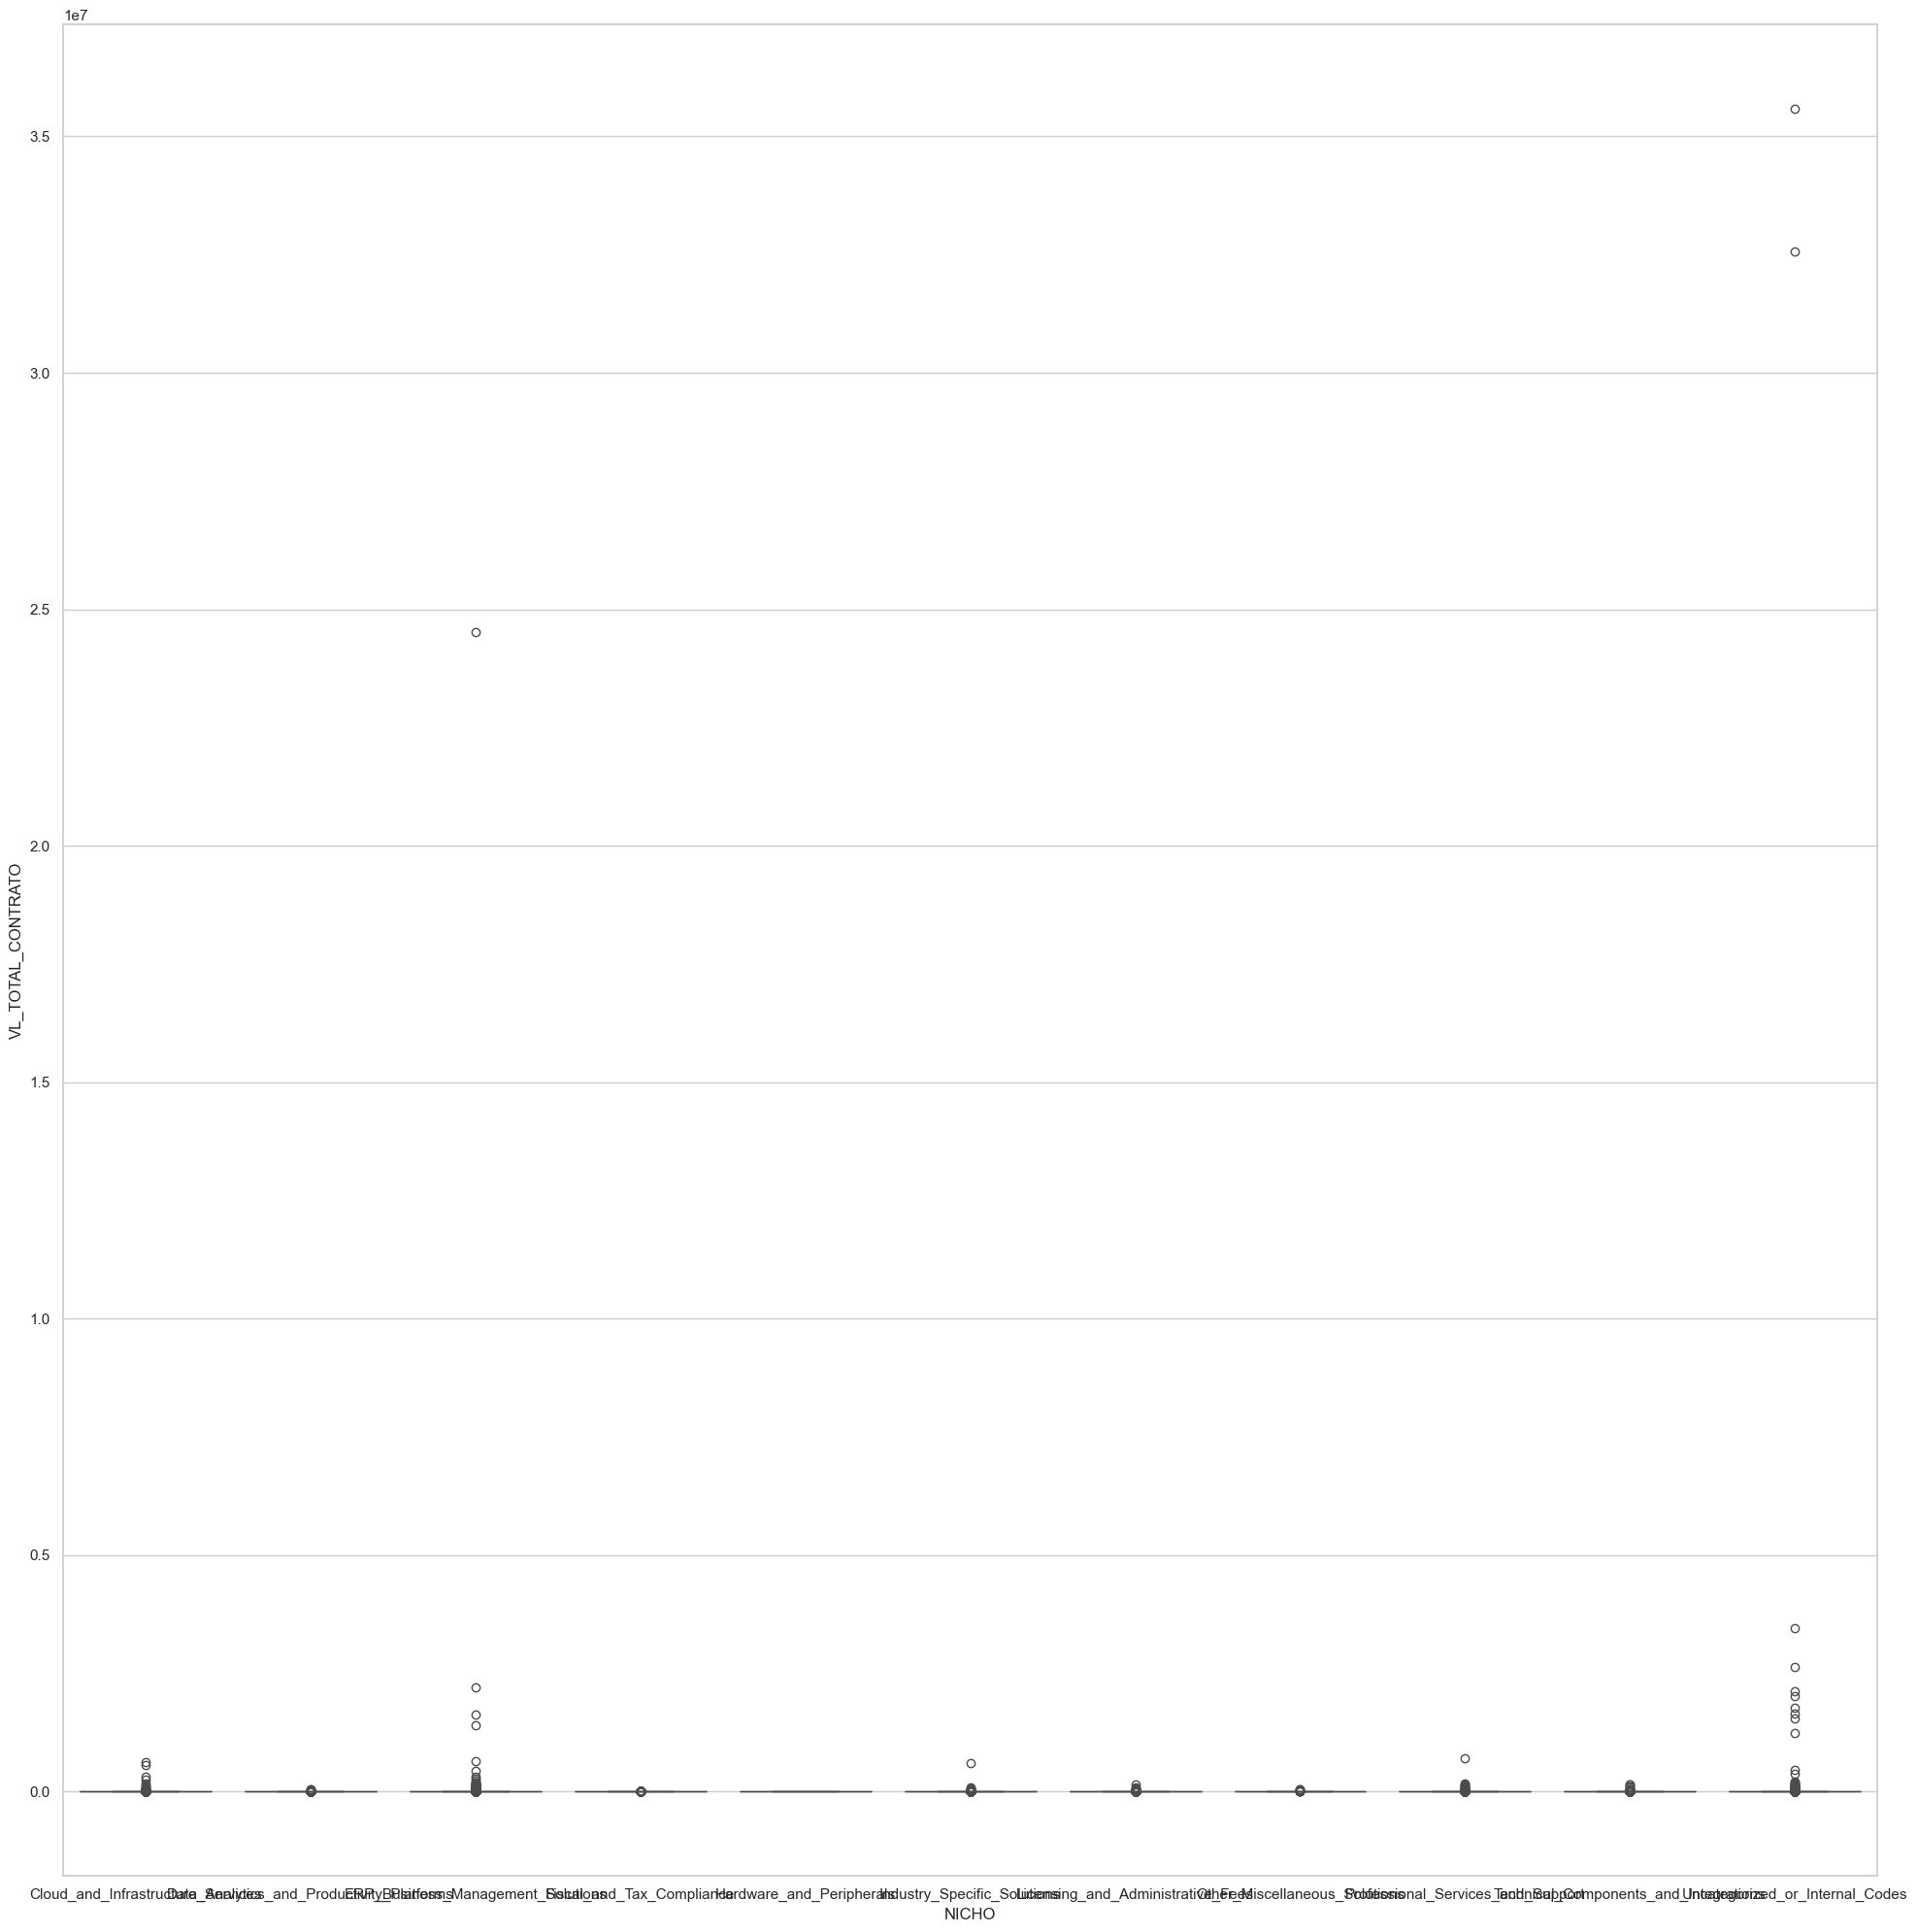

In [136]:
#carregar variaveis para plot
variaveis_numericas = df_clientes_varejo_att[['VL_TOTAL_CONTRATO','NICHO']]  # Lista de variáveis numéricas para plotagem

plt.rcParams["figure.figsize"] = [20.00, 20.00] # Parâmetro de tamanho da figura
plt.rcParams["figure.autolayout"] = True # Parâmetro de layout da figura

plt.rcParams['font.size'] = 10 # Parâmetro de tamanho da fonte
plt.rcParams['axes.titlesize'] = 20 # Parâmetro de tamanho do título dos eixos

sns.boxplot(data = variaveis_numericas, x='NICHO', y='VL_TOTAL_CONTRATO')  # Boxplot para o nicho

plt.show() # Exibir boxplot

### 13.2 Investigando VL_TOTAL_CONTRATO

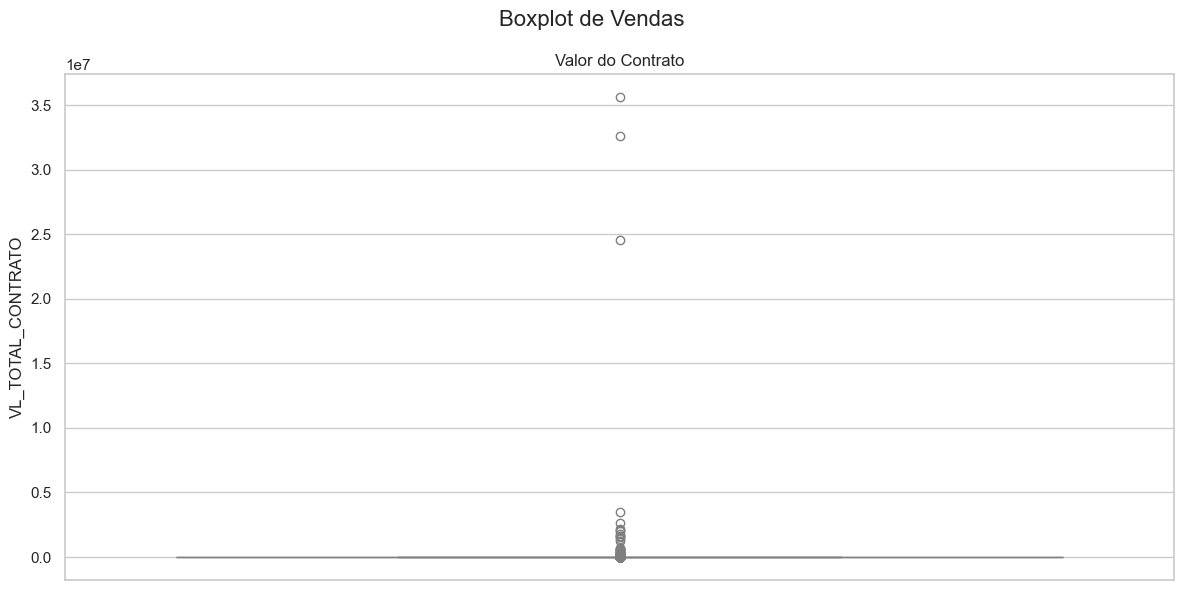

In [137]:
# Dados
valores = df_clientes_varejo_att["VL_TOTAL_CONTRATO"]

# Cálculo dos quartis e IQR
q1 = valores.quantile(0.25)
q2 = valores.quantile(0.50)
q3 = valores.quantile(0.75)
iqr = q3 - q1

lim_inferior = q1 - 1.5 * iqr
lim_superior = q3 + 1.5 * iqr

# Definindo o estilo do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plotando
sns.boxplot(
    y=df_clientes_varejo_att['VL_TOTAL_CONTRATO'],
    color='lightgray'
)

# Parâmetros boxplot Antes da Remoção
plt.title('Valor do Contrato')

# Definindo o título geral
plt.suptitle('Boxplot de Vendas', fontsize=16)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


In [138]:
df_clientes_varejo_att['VL_TOTAL_CONTRATO'].describe()

count    3.621700e+04
mean     4.975089e+03
std      2.868281e+05
min      0.000000e+00
25%      4.000000e-02
50%      9.967000e+01
75%      7.711800e+02
max      3.558788e+07
Name: VL_TOTAL_CONTRATO, dtype: float64

### 13.3 Winsorizando coluna VL_TOTAL_CONTRATO

Após identificarmos uma grande disparidade nos valores extremos (outliers), optamos por aplicar o método de Winsorização, que tem como objetivo "achatar" os dados, reduzindo o impacto desses valores atípicos.

A Winsorização é uma técnica estatística de tratamento de outliers que substitui os valores muito baixos e muito altos por limites definidos com base em percentis. Isso reduz a influência dos extremos sem excluir registros do conjunto de dados.

Com essa abordagem, buscamos uma análise mais robusta e confiável, especialmente em medidas estatísticas sensíveis a outliers (como média, desvio padrão) e na preparação para modelos preditivos, que podem ser afetados por esses valores extremos.

In [139]:
from scipy.stats.mstats import winsorize

df_tratado = df_clientes_varejo_att.copy()  # Cria uma cópia do DataFrame original

# Winsorizando com limite inferior e superior de 2%
winsorize(df_tratado['VL_TOTAL_CONTRATO'], limits=[0.02, 0.02])

masked_array(data=[1.639504e+04, 4.203000e+01, 4.200000e-01, ...,
                   0.000000e+00, 0.000000e+00, 0.000000e+00],
             mask=False,
       fill_value=1e+20)

### 13.4 Comparação entre antes e depois da winsorização

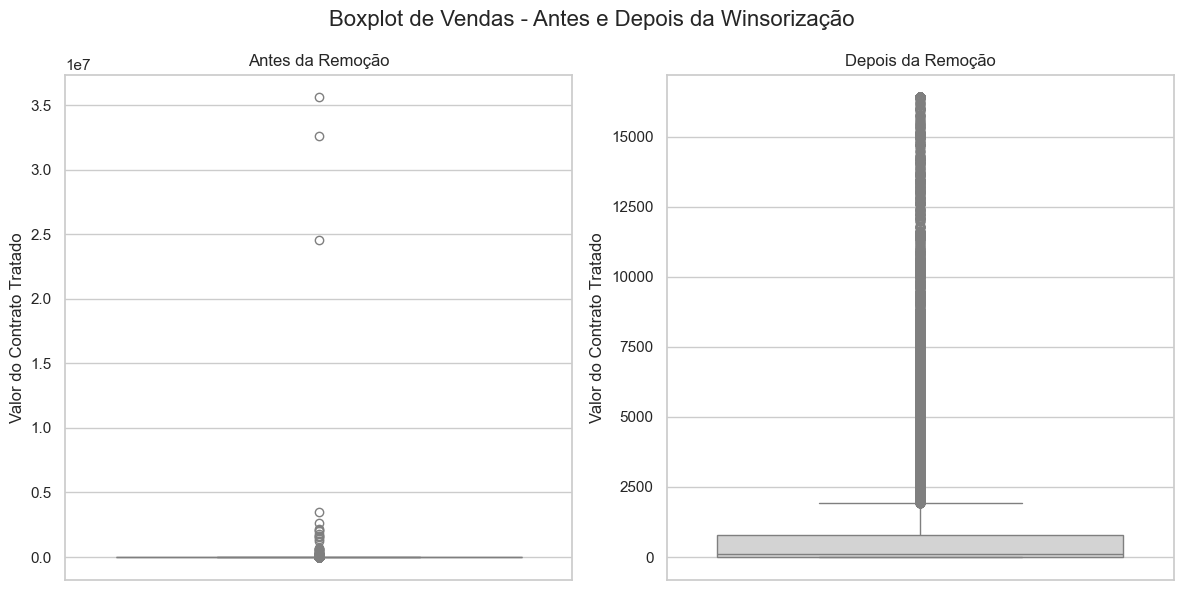

In [140]:
# Definindo o estilo do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


# Plotando lado a lado
plt.subplot(1, 2, 1)
sns.boxplot(
    y=df_clientes_varejo_att['VL_TOTAL_CONTRATO'],
    color='lightgray'
)

# Parâmetros boxplot Antes da Remoção
plt.title('Antes da Remoção')
plt.ylabel('Valor do Contrato Tratado')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.boxplot(
    y=df_tratado['VL_TOTAL_CONTRATO'], 
    color='lightgray'
)

# Parâmetros boxplot Depois da Remoção
plt.title('Depois da Remoção')
plt.ylabel('Valor do Contrato Tratado')
plt.xlabel('')

# Definindo o título geral
plt.suptitle('Boxplot de Vendas - Antes e Depois da Winsorização', fontsize=16)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [141]:
df_clientes_varejo_att['VL_TOTAL_CONTRATO'].describe()

count    3.621700e+04
mean     4.975089e+03
std      2.868281e+05
min      0.000000e+00
25%      4.000000e-02
50%      9.967000e+01
75%      7.711800e+02
max      3.558788e+07
Name: VL_TOTAL_CONTRATO, dtype: float64

In [142]:
df_tratado['VL_TOTAL_CONTRATO'].describe()

count    36217.000000
mean      1214.332225
std       3009.569157
min          0.000000
25%          0.040000
50%         99.670000
75%        771.180000
max      16395.040000
Name: VL_TOTAL_CONTRATO, dtype: float64

# 14. Leitura e Explorando a tabela Histórico

In [284]:
# Importando tabela histórico
df_historico = pd.read_csv(r"src/historico.csv", sep=';')  # Leitura do arquivo CSV de histórico
df_historico.info()  # Exibe informações gerais sobre o DataFrame
df_historico.sample(5) #Exibindo tabela histórico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22740 entries, 0 to 22739
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NR_PROPOSTA             22740 non-null  object
 1   ITEM_PROPOSTA           22740 non-null  int64 
 2   DT_UPLOAD               22740 non-null  object
 3   HOSPEDAGEM              22740 non-null  object
 4   CD_CLI                  22740 non-null  object
 5   FAT_FAIXA               22740 non-null  object
 6   CD_PROD                 22740 non-null  object
 7   QTD                     22740 non-null  object
 8   MESES_BONIF             22740 non-null  int64 
 9   VL_PCT_DESC_TEMP        22740 non-null  object
 10  VL_PCT_DESCONTO         22740 non-null  object
 11  PRC_UNITARIO            22740 non-null  object
 12  VL_DESCONTO_TEMPORARIO  22740 non-null  object
 13  VL_TOTAL                22740 non-null  object
 14  VL_FULL                 22740 non-null  object
 15  VL

,NR_PROPOSTA,ITEM_PROPOSTA,DT_UPLOAD,HOSPEDAGEM,CD_CLI,FAT_FAIXA,CD_PROD,QTD,MESES_BONIF,VL_PCT_DESC_TEMP,VL_PCT_DESCONTO,PRC_UNITARIO,VL_DESCONTO_TEMPORARIO,VL_TOTAL,VL_FULL,VL_DESCONTO
2655,AAKCYE,6,2024-05-23,ON PREMISES,T43474,Faixa 11 - Acima de 850 M,AUT.05.000618,450,0,0,0,"0,193377438924309",0,"87,019847515939","87,019847515939",0
8212,AAMEHK,4,2025-01-31,ON PREMISES,TFBZBU,Faixa 04 - De 25 M ate 35 M,7TA1001082,250,999,"12,6115721037593",0,"1,29058421195137","96,7938158963525","322,646052987842","322,646052987842",0
13426,AAMFZ8,4,2025-01-31,ON PREMISES,TFEDZG,Sem Informações de Faturamento,AUT.06.000054,1,0,0,0,"315,289302593982",0,"315,289302593982","315,289302593982",0
14757,AAJUSA,1,2024-04-08,ON PREMISES,TEWBTY,Faixa 11 - Acima de 850 M,2010067-2,345,0,0,"0,00420385736791976","75,6946557667632",0,"26114,3745810897","26114,6562395333","1,4461269345644"
5478,AALVGS,4,2024-12-05,TOTVS CLOUD,TFDRCQ,Faixa 07 - De 75 M ate 150 M,7T63301081,1,12,"14,7132485562771",0,"299,428148744821","104,797960324872","299,428148744821","299,428148744821",0


# 15. Alterando o tipo de dados

In [285]:
# Alterando tipos de dados
df_historico['NR_PROPOSTA'] = df_historico['NR_PROPOSTA'].astype('category')
df_historico['ITEM_PROPOSTA'] = df_historico['ITEM_PROPOSTA'].astype(int)
df_historico['DT_UPLOAD'] = pd.to_datetime(df_historico['DT_UPLOAD'])
df_historico['HOSPEDAGEM'] = df_historico['HOSPEDAGEM'].astype('string')  
df_historico['CD_CLI'] = df_historico['CD_CLI'].astype('category')
df_historico['FAT_FAIXA'] = df_historico['FAT_FAIXA'].astype('string')  
df_historico['CD_PROD'] = df_historico['CD_PROD'].astype('category')
df_historico['QTD'] = df_historico['QTD'].str.replace(',','.', regex=False).astype(float).round(1)
df_historico['MESES_BONIF'] = df_historico['MESES_BONIF'].astype(int)
df_historico['VL_PCT_DESC_TEMP'] = df_historico['VL_PCT_DESC_TEMP'].str.replace(',','.', regex=False).astype(float).round(2)
df_historico['VL_PCT_DESCONTO'] = df_historico['VL_PCT_DESCONTO'].str.replace(',','.', regex=False).astype(float).round(2)
df_historico['PRC_UNITARIO'] = df_historico['PRC_UNITARIO'].str.replace(',','.', regex=False).astype(float).round(2)
df_historico['VL_DESCONTO_TEMPORARIO'] = df_historico['VL_DESCONTO_TEMPORARIO'].str.replace(',','.', regex=False).astype(float).round(2)
df_historico['VL_TOTAL'] = df_historico['VL_TOTAL'].str.replace(',','.', regex=False).astype(float).round(2)
df_historico['VL_FULL'] = df_historico['VL_FULL'].str.replace(',','.', regex=False).astype(float).round(2)
df_historico['VL_DESCONTO'] = df_historico['VL_DESCONTO'].str.replace(',','.', regex=False).astype(float).round(2)

In [286]:
df_historico.info()  # Exibe informações do DataFrame após conversão de tipos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22740 entries, 0 to 22739
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   NR_PROPOSTA             22740 non-null  category      
 1   ITEM_PROPOSTA           22740 non-null  int64         
 2   DT_UPLOAD               22740 non-null  datetime64[ns]
 3   HOSPEDAGEM              22740 non-null  string        
 4   CD_CLI                  22740 non-null  category      
 5   FAT_FAIXA               22740 non-null  string        
 6   CD_PROD                 22740 non-null  category      
 7   QTD                     22740 non-null  float64       
 8   MESES_BONIF             22740 non-null  int64         
 9   VL_PCT_DESC_TEMP        22740 non-null  float64       
 10  VL_PCT_DESCONTO         22740 non-null  float64       
 11  PRC_UNITARIO            22740 non-null  float64       
 12  VL_DESCONTO_TEMPORARIO  22740 non-null  float6

# 16. Analisando Missings / Valores Nulos

In [287]:
df_historico.isnull().sum()  # Verifica valores nulos em cada coluna

NR_PROPOSTA               0
ITEM_PROPOSTA             0
DT_UPLOAD                 0
HOSPEDAGEM                0
CD_CLI                    0
FAT_FAIXA                 0
CD_PROD                   0
QTD                       0
MESES_BONIF               0
VL_PCT_DESC_TEMP          0
VL_PCT_DESCONTO           0
PRC_UNITARIO              0
VL_DESCONTO_TEMPORARIO    0
VL_TOTAL                  0
VL_FULL                   0
VL_DESCONTO               0
dtype: int64

# 17. Identificando linhas duplicadas

In [288]:
duplicadas_hist = df_historico[df_historico.duplicated(keep=False)]  # Identifica linhas duplicadas
duplicadas_hist.shape # Mostra o tamanho do DataFrame de linhas duplicadas

(0, 16)

# 18. Identificando Outliers

ITEM_PROPOSTA : int64
QTD : float64
MESES_BONIF : int64
VL_PCT_DESC_TEMP : float64
VL_PCT_DESCONTO : float64
PRC_UNITARIO : float64
VL_DESCONTO_TEMPORARIO : float64
Coluna: ITEM_PROPOSTA
  Limite inferior: -3.5
  Limite superior: 8.5

Coluna: QTD
  Limite inferior: -18.5
  Limite superior: 33.5

Coluna: MESES_BONIF
  Limite inferior: 0.0
  Limite superior: 0.0

Coluna: VL_PCT_DESC_TEMP
  Limite inferior: 0.0
  Limite superior: 0.0

Coluna: VL_PCT_DESCONTO
  Limite inferior: -6.300000000000001
  Limite superior: 10.5

Coluna: PRC_UNITARIO
  Limite inferior: -916.93
  Limite superior: 1592.6699999999998

Coluna: VL_DESCONTO_TEMPORARIO
  Limite inferior: 0.0
  Limite superior: 0.0



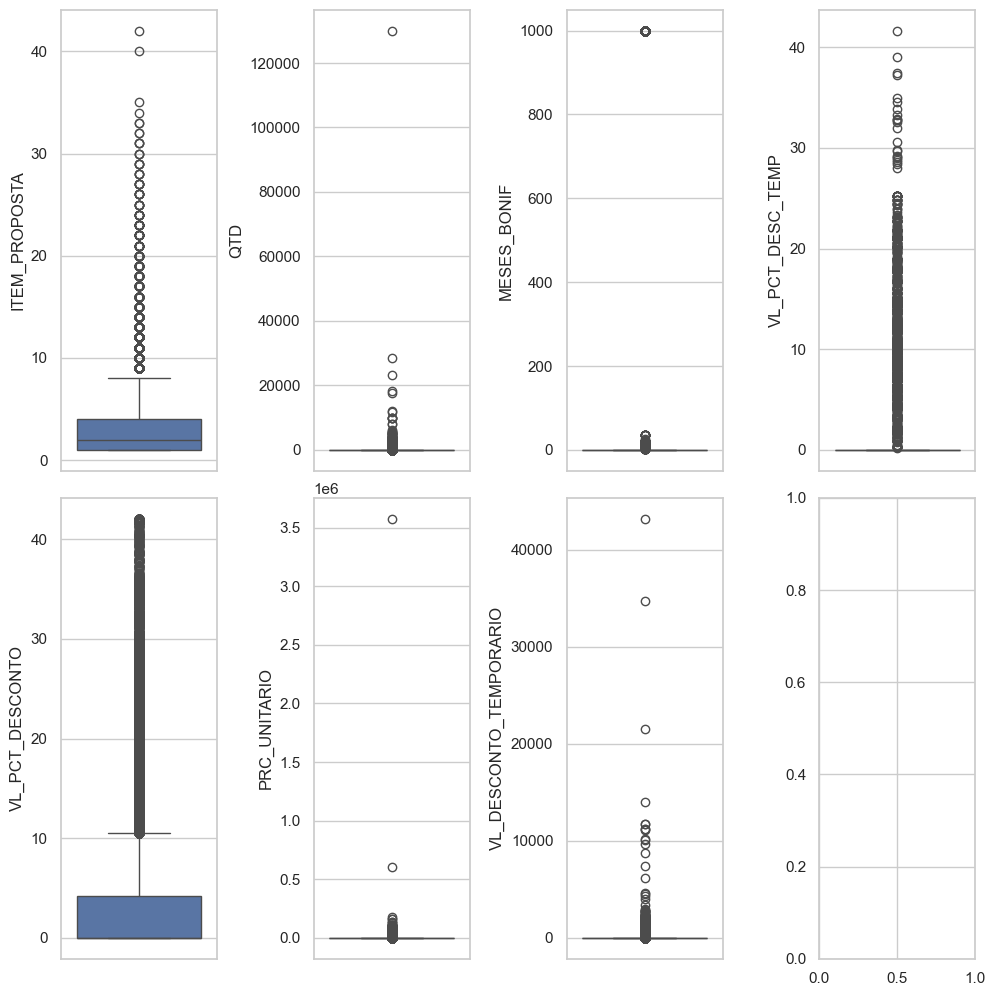

In [289]:
# Loop for para carregar variáveis 
variaveis_numericas = []
for i in df_historico.columns[0:13].tolist():
        if df_historico.dtypes[i] == 'int64' or df_historico.dtypes[i] == 'float64':            
            print(i, ':' , df_historico.dtypes[i]) 
            variaveis_numericas.append(i)
  
    
# Definindo parâmetros do gráfico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 8 
plt.rcParams['axes.titlesize'] = 15

f, axes = plt.subplots(2,4) #2 linhas e 4 colunas

# Loop para criar boxplots para cada variável numérica
linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_historico, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0   

# Loop para calcular limites inferior e superior para cada variável numérica
for coluna in variaveis_numericas:
    Q1 = df_historico[coluna].quantile(0.25)
    Q3 = df_historico[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    print(f'Coluna: {coluna}')
    print(f'  Limite inferior: {limite_inferior}')
    print(f'  Limite superior: {limite_superior}\n')

# Exibindo o gráfico
plt.show() 

# 19. Definindo os Outliers com o algoritmo K-Nearest Neighbors (KNN)


O KNN pode ser utilizado para detecção e tratamento de outliers com base na ideia de proximidade entre amostras. 

Dessa forma, o KNN pode ser utilizado para identificar outliers em um conjunto de dados, considerando a distância entre os pontos e a densidade local. O algoritmo calcula a distância entre um ponto e seus vizinhos mais próximos e, se essa distância for maior do que um determinado limiar, o ponto é considerado um outlier.

Escolhemos este algoritmo para essas váriaveis por ser simples de implementar e facilitará a identificação de outliers para essas varáveis definidas.

In [290]:
from pyod.models.knn import KNN # Importando o algoritmo KNN

In [291]:
# Instanciando o objeto KNN
detector = KNN()

# Treinando um detector de OUTLIERS
detector.fit(df_historico[variaveis_numericas])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [292]:
# A propiedade LABELS_ retorna um ARRAY com 0 e 1
# 0 significa que NÃO é outlier
# 1 significa que É outlier
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0], shape=(22740,))

In [293]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([20467,  2273]))

In [294]:
# Observando o calculo da distancia realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([ 3.53      ,  0.29      ,  2.54472002, ...,  1.38621788,
       10.82151561,  1.        ], shape=(22740,))

In [295]:
# Criando uma lista somente com os outliers
outliers = []
for i in range(len(previsoes)):
    #print(i)
    if previsoes[i] == 1:
        outliers.append(i)

In [296]:
# Exibindo lista com os ID´s dos registros que foram considerados OUTLIERS
print(outliers)

# Exibindo o tamanho da lista de outliers
print(f'\nQuantidade de outliers: {len(outliers)}')

[11, 16, 18, 33, 41, 85, 105, 128, 133, 141, 152, 165, 167, 182, 183, 191, 192, 218, 229, 230, 231, 254, 271, 281, 289, 327, 345, 347, 360, 373, 383, 400, 424, 427, 428, 437, 450, 453, 461, 474, 503, 508, 513, 551, 561, 566, 578, 615, 623, 630, 636, 640, 650, 667, 688, 692, 699, 708, 729, 730, 731, 735, 742, 752, 767, 769, 797, 842, 866, 875, 888, 907, 913, 937, 954, 963, 976, 978, 983, 991, 995, 1013, 1020, 1027, 1045, 1052, 1072, 1083, 1097, 1100, 1103, 1114, 1119, 1138, 1162, 1167, 1180, 1190, 1192, 1236, 1239, 1240, 1247, 1266, 1267, 1268, 1277, 1289, 1291, 1310, 1327, 1340, 1354, 1367, 1369, 1371, 1380, 1387, 1410, 1413, 1415, 1424, 1425, 1428, 1443, 1446, 1455, 1464, 1468, 1472, 1482, 1490, 1504, 1505, 1534, 1535, 1539, 1549, 1573, 1594, 1608, 1617, 1623, 1627, 1639, 1645, 1656, 1678, 1697, 1698, 1699, 1703, 1705, 1713, 1737, 1777, 1783, 1784, 1789, 1792, 1795, 1807, 1808, 1817, 1837, 1844, 1850, 1852, 1882, 1884, 1893, 1901, 1940, 1949, 1958, 1992, 1993, 2002, 2006, 2017, 2021, 

In [297]:
# Fazendo um SLICE no arquivo original filtrando todas as linhas que são outliers (lista de outliers) e todas colunas
lista_outliers = df_historico[variaveis_numericas].iloc[outliers,:]
lista_outliers

,ITEM_PROPOSTA,QTD,MESES_BONIF,VL_PCT_DESC_TEMP,VL_PCT_DESCONTO,PRC_UNITARIO,VL_DESCONTO_TEMPORARIO
11,11,1.0,0,0.00,17.27,7243.58,0.00
16,7,12200.0,0,0.00,41.24,0.00,0.00
18,12,12.0,999,17.66,0.00,293.67,1480.11
33,1,1.0,0,0.00,0.00,63484.80,0.00
41,1,1.0,0,0.00,0.00,46803.79,0.00
...,...,...,...,...,...,...,...
22706,1,1.0,0,0.00,17.66,7379.44,0.00
22712,1,1.0,0,0.00,0.00,6911.19,0.00
22728,1,4.0,999,13.05,0.00,432.07,536.37
22733,5,500.0,18,16.82,0.00,0.77,153.86


In [298]:
lista_outliers.shape # Exibindo o tamanho do DataFrame de outliers

(2273, 7)

# 20. Winsorizando os dados

In [299]:
cols_to_winsorize = df_historico[variaveis_numericas] # Selecionando colunas numéricas para winsorização

# Função para aplicar winsorização em uma série
def winsorize_series(series, limits=[0.05, 0.05]): # Limites padrão de 5% para cada extremidade
    return winsorize(series, limits=limits)

# Loop para aplicar winsorização em cada coluna selecionada
for col in cols_to_winsorize:
    df_historico[col] = winsorize_series(df_historico[col])

df_historico.describe()  # Exibe estatísticas descritivas das colunas após winsorização

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:4842: UserWa

,ITEM_PROPOSTA,DT_UPLOAD,QTD,MESES_BONIF,VL_PCT_DESC_TEMP,VL_PCT_DESCONTO,PRC_UNITARIO,VL_DESCONTO_TEMPORARIO,VL_TOTAL,VL_FULL,VL_DESCONTO
count,22740.000000,22740,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,2.274000e+04,2.274000e+04,22740.000000
mean,2.855893,2024-09-20 22:30:23.746701568,27.152309,72.860510,0.802291,4.082079,846.299263,6.606668,4.105135e+03,3.947741e+03,810.021677
min,1.000000,2024-03-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.760000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,2024-06-25 00:00:00,1.000000,0.000000,0.000000,0.000000,24.170000,0.000000,1.117075e+02,6.011000e+01,0.000000
50%,2.000000,2024-09-27 00:00:00,1.000000,0.000000,0.000000,0.000000,105.100000,0.000000,5.187850e+02,3.817500e+02,0.000000
75%,4.000000,2024-12-27 00:00:00,14.000000,0.000000,0.000000,4.200000,651.570000,0.000000,2.352753e+03,2.273967e+03,21.020000
max,10.000000,2025-03-25 00:00:00,250.000000,999.000000,10.510000,24.830000,6053.550000,96.690000,3.573279e+06,2.962229e+06,374796.760000
std,2.532352,NaN,61.672463,259.232024,2.636283,7.744145,1610.465205,22.997578,3.443398e+04,2.563757e+04,6124.934331


In [300]:
df_historico[variaveis_numericas].shape # Exibe o tamanho do DataFrame após winsorização

(22740, 7)

# 21. Exibindo os dados tratados 

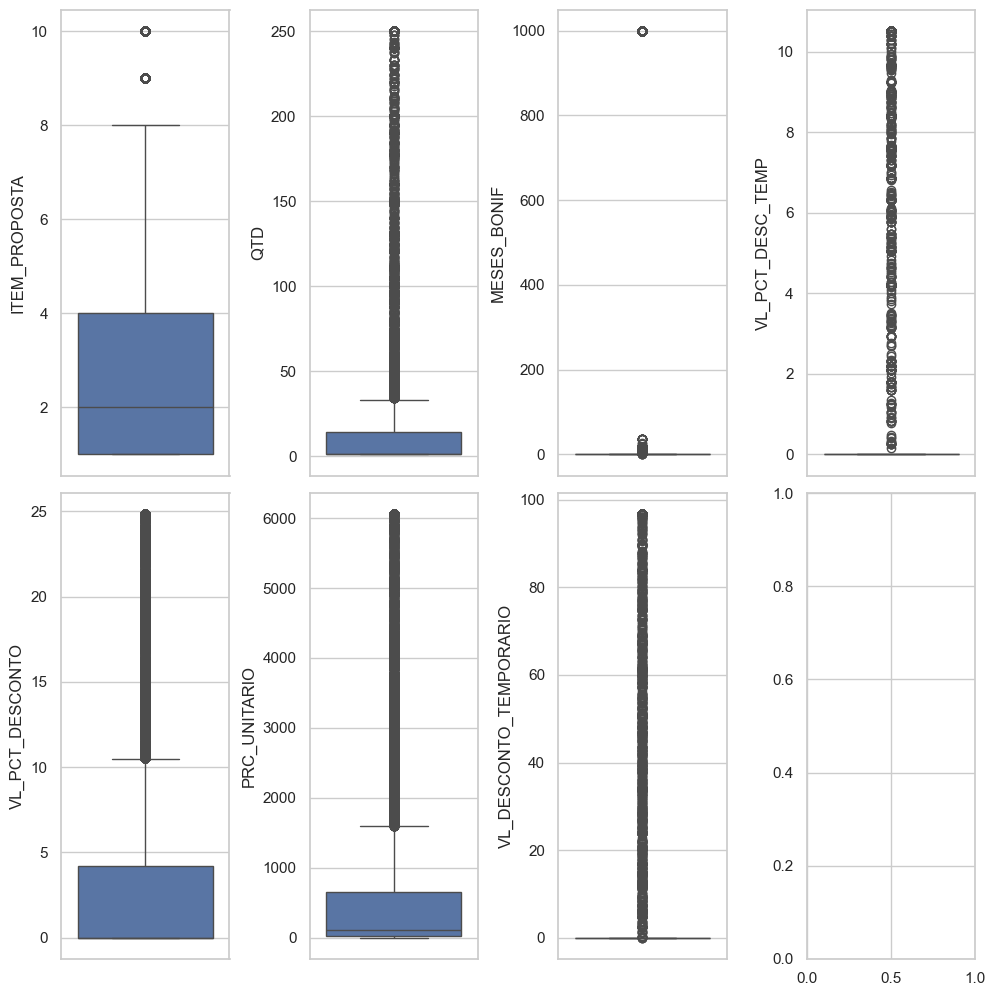

In [301]:
# Parâmetros do gráfico
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 8 
plt.rcParams['axes.titlesize'] = 15

f, axes = plt.subplots(2,4) #2 linhas e 4 colunas

# Loop para criar boxplots para cada variável numérica após winsorização
linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_historico, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0   

# Exibindo o gráfico
plt.show()

In [302]:
#somando toda a coluna VL_TOTAL_CONTRATO
df_tratado['VL_TOTAL_CONTRATO'].sum()  # Soma total da coluna 'VL_TOTAL_CONTRATO'

np.float64(43979470.18)

# 22. Conectando ao banco de dados

In [207]:
#Coleta informações que necessitamos para gerar a conexão com o banco Azure
userDBAzure = getpass.getpass(prompt='Azure_Username: ')
passwordDBAzure = getpass.getpass(prompt='Azure_Password: ')
password_encoded = quote_plus(passwordDBAzure)
server = "ukysynserver.database.windows.net"
db = "ukysyndb"

In [208]:
#Cria os parâmetros para geração da engine de conexão
params = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    f"SERVER={server};"
    f"DATABASE={db};"
    f"UID={userDBAzure};"
    f"PWD={password_encoded};"
)

# Cria a engine de conexão com o banco de dados
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

In [209]:
#Realiza o teste de conexão
try:
    conn = engine.connect()
    print('Conexão estabelecida!')
    conn.close()
except Exception as e:
    print(f'Ocorreu um erro. Erro: {e}')

Conexão estabelecida!


# 21. Inserindo os dados tratados no banco de dados

In [210]:
#Cria uma função genérica de inserção para ser usada na inserção de dados das dimensões
def insert_data(df, table):
    print(f"Começando o processo de inserção para a tabela {table}!")
    try:
        conn = engine.connect()
        trans = conn.begin()
        df.to_sql(table, con=conn, if_exists='replace', index=False)
        print(f"Inserção concluída com sucesso!")
        trans.commit()
        conn.close()
    except Exception as e:
        trans.rollback()
        print(f"Ocorreu um erro. Erro: {e}")

In [211]:
#Inserindo a tabela dados clientes após tratamento como SPRINT2_VAREJO
insert_data(df_tratado, 'SPRINT2_VAREJO')

Começando o processo de inserção para a tabela SPRINT2_VAREJO!


Inserção concluída com sucesso!


In [161]:
#Inserindo a tabela histórico após tratamento como SPRINT2_HISTORICO
insert_data(df_historico, 'SPRINT2_HISTORICO')

Começando o processo de inserção para a tabela SPRINT2_HISTORICO!
Inserção concluída com sucesso!
